In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

3D Datasets

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

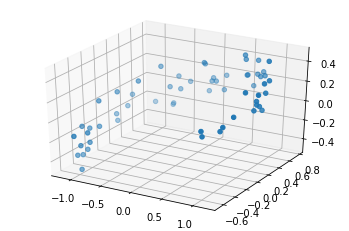

In [3]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], cmap='Greens');
plt.show()

Note: the `svd()` function returns `U`, `s` and `Vt`, where `Vt` is equal to $\mathbf{V}^T$, the transpose of the matrix $\mathbf{V}$. Earlier versions of the book mistakenly said that it returned `V` instead of `Vt`. Also, Equation 8-1 should actually contain $\mathbf{V}$ instead of $\mathbf{V}^T$, like this:

$
\mathbf{V} =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

In [4]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_centered = scl.fit_transform(X)

In [5]:
from numpy.linalg import svd

U,s,Vt = svd(X_centered)

m, n = X.shape
# create S, matrice diagonale des eigenvalues s
S = np.zeros((m,n))
S[:n,:n] = np.diag(s)

In [6]:
# Check X_centered est bien "reconstruit" par la SVD
np.allclose(X_centered,U.dot(S).dot(Vt))

True

Projet X_centered sur l'hyperplan W

In [7]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

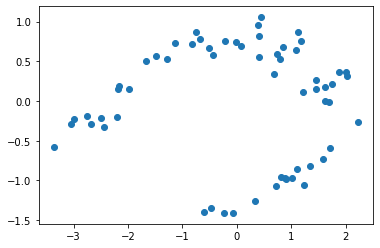

In [8]:
plt.scatter(X2D[:,0],X2D[:,1])
plt.show()

In [9]:
X2D[:5,:]

array([[-2.68376956, -0.28559669],
       [ 0.40523341,  0.55863105],
       [-2.49003468, -0.21595091],
       [-0.75299162,  0.87411153],
       [-0.22487382,  0.75654968]])

Calcule avec Covariance + vecteurs propres

In [10]:
# calculate the mean of each column
M = np.mean(X.T, axis=1)
# center columns by subtracting column means
C = X - M
# avec covariance on centered data (not normalized)
cov = np.cov(C.T)

# eigenvalues
values, vectors = np.linalg.eig(cov)

X3D = vectors.T.dot(C.T)
X3D.T[:5,:]

array([[-1.26203346,  0.42067648,  0.0138445 ],
       [ 0.08001485, -0.35272239, -0.15436525],
       [-1.17545763,  0.36085729, -0.00722714],
       [-0.89305601, -0.30862856,  0.03418723],
       [-0.73016287, -0.25404049,  0.19736924]])

In [11]:
# avec scikit learn
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

X3D_recover = pca.inverse_transform(X2D)
print(np.allclose(X, X3D_recover))

print('erreur recover :', np.mean(np.sum(np.square(X3D_recover - X),axis=1)))
X2D[:5,:]

False
erreur recover : 0.010170337792848549


array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [16]:
print('principal components:\n',pca.components_,'\n')
print('variance explained ratio:\n',pca.explained_variance_ratio_)

principal components:
 [[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]] 

variance explained ratio:
 [0.84248607 0.14631839]


Choisir le bon d :

In [17]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)

In [19]:
d = np.argmax(cumsum >= 0.95) + 1 # +1 puisque là c'est un index 
d

2

In [20]:
pca = PCA(n_components=d)
X_95 = pca.fit_transform(X)